## Model Constructor & Explainer 
### for Group20 || Bike Curious || Aine, David, and Eugene's
# Dublin Bikes App

In [1]:
# Import pandas as the workhorse of dataframe manipulation
import pandas as pd

# Import numpy for help with computation
import numpy as np

# Import datetime for... datetime
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

# for pickling
from joblib import dump, load

import mysql.connector
import pandas as pd
import requests
import json
from datetime import datetime

# Get bikes data into csv

In [2]:
print("trying to connect")
mydb = mysql.connector.connect(
    host="dublinbikes.chj6z1a17hdc.us-east-1.rds.amazonaws.com",
    user="admin",
    passwd="Aws72gene!",
    database='DublinBikes',
    charset='utf8mb4',
 )

mycursor = mydb.cursor(dictionary=False)

print("Connected")

cursor = mydb.cursor()

#Pandas read sql query
sql_select_Query = pd.read_sql_query("SELECT DayOfWeek, StationNumber, Time, Date, AvailableBikes, AvailableBikeStands FROM DublinBikes.LiveHistoricalData", mydb)


#Create a dataframe with all of the rows fetches in the sql query
df = pd.DataFrame(sql_select_Query, columns=['DayOfWeek', 'StationNumber', 'Time', 'Date', 'AvailableBikes', 'AvailableBikeStands'])

dt = df['Time']

df['NumericTime'] =(pd.to_timedelta(dt//100, unit='H') + pd.to_timedelta(dt % 100, unit = 'T'))

df['NumericTime'] = df['NumericTime'].astype("string")

df['NumericTime'] = df['NumericTime'].str.slice(start=7, stop=15)

df['Date'] = df['Date'].astype("string")

df['DateTime'] = df['Date'] + " " + df['NumericTime']

df['DateTime'] = pd.to_datetime(df['DateTime'])

df

df_w_datetime = df[['DayOfWeek', 'StationNumber', 'AvailableBikes', 'AvailableBikeStands', 'DateTime']]

# Save to csv file (smaller than JSON file)
csv = df_w_datetime.to_csv("bikesDataframe.csv", index = False)

trying to connect
Connected


# Get weather data into csv

In [3]:
print("trying to connect")
mydb = mysql.connector.connect(
    host="dublinbikes.chj6z1a17hdc.us-east-1.rds.amazonaws.com",
    user="admin",
    passwd="Aws72gene!",
    database='DublinBikes',
    charset='utf8mb4',
 )

mycursor = mydb.cursor(dictionary=False)

print("Connected")

cursor = mydb.cursor()

#Pandas read sql query
sql_select_Query = pd.read_sql_query("SELECT Day, ID, MainDescription, Temperature, FeelsLike, Windspeed, Time, Date FROM DublinBikes.HistoricalWeather", mydb)


#Create a dataframe with all of the rows fetches in the sql query
df_W = pd.DataFrame(sql_select_Query, columns=['Day', 'ID', 'MainDescription', 'Temperature', 'FeelsLike', 'Windspeed', 'Time', 'Date'])

dt = df_W['Time']

df_W['NumericTime'] =(pd.to_timedelta(dt//100, unit='H') + pd.to_timedelta(dt % 100, unit = 'T'))

df_W['NumericTime'] = df_W['NumericTime'].astype("string")

df_W['NumericTime'] = df_W['NumericTime'].str.slice(start=7, stop=15)

df_W['Date'] = df_W['Date'].astype("string")

df_W['DateTime'] = df_W['Date'] + " " + df_W['NumericTime']

df_W['DateTime'] = pd.to_datetime(df_W['DateTime'])


df_Weather_datetime = df_W[['Day', 'ID', 'MainDescription', 'Temperature', 'FeelsLike', 'Windspeed', 'DateTime']]

# Save to csv file (smaller than JSON file)
csv = df_Weather_datetime.to_csv("weatherDataframe.csv", index = False)

trying to connect
Connected


# Read bike df back in from csv file 

In [4]:
df = pd.read_csv("bikesDataframe.csv")

In [5]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [6]:
df

,DayOfWeek,StationNumber,AvailableBikes,AvailableBikeStands,DateTime
0,0,42,8,22,2021-03-01 17:25:00
1,0,30,8,12,2021-03-01 17:25:00
2,0,54,9,24,2021-03-01 17:25:00
3,0,108,11,29,2021-03-01 17:25:00
4,0,56,20,19,2021-03-01 17:25:00
...,...,...,...,...,...
1044939,4,39,9,11,2021-04-16 12:35:00
1044940,4,83,8,32,2021-04-16 12:35:00
1044941,4,92,6,34,2021-04-16 12:35:00
1044942,4,21,10,20,2021-04-16 12:35:00


# Read weather df back in from csv file

In [7]:
df_W = pd.read_csv("weatherDataframe.csv")

In [8]:
df_W.shape

(8611, 7)

In [9]:
df_W.head(10)

,Day,ID,MainDescription,Temperature,FeelsLike,Windspeed,DateTime
0,4,803,Clouds,2.0,-3.0,3.0,2021-03-05 18:54:00
1,4,803,Clouds,2.0,-3.0,3.0,2021-03-05 18:58:00
2,4,802,Clouds,1.0,-3.0,3.0,2021-03-05 19:21:00
3,4,802,Clouds,1.0,-3.0,3.0,2021-03-05 19:25:00
4,4,802,Clouds,1.0,-3.0,3.0,2021-03-05 19:30:00
5,4,802,Clouds,1.0,-3.0,3.0,2021-03-05 19:35:00
6,4,802,Clouds,1.0,-3.0,3.0,2021-03-05 19:40:00
7,4,802,Clouds,1.0,-3.0,3.0,2021-03-05 19:45:00
8,4,802,Clouds,1.0,-3.0,3.0,2021-03-05 19:50:00
9,4,802,Clouds,1.0,-3.0,3.0,2021-03-05 19:55:00


In [10]:
df_W['DateTime'] = pd.to_datetime(df_W['DateTime'])

# Join into one table

In [11]:
test = df.set_index('DateTime').join(df_W.set_index('DateTime'))

In [12]:
test

,DayOfWeek,StationNumber,AvailableBikes,AvailableBikeStands,Day,ID,MainDescription,Temperature,FeelsLike,Windspeed
DateTime,,,,,,,,,,
2021-03-01 17:25:00,0,42,8,22,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01 17:25:00,0,30,8,12,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01 17:25:00,0,54,9,24,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01 17:25:00,0,108,11,29,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01 17:25:00,0,56,20,19,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-04-16 12:35:00,4,39,9,11,4.0,802.0,Clouds,11.0,10.0,6.0
2021-04-16 12:35:00,4,83,8,32,4.0,802.0,Clouds,11.0,10.0,6.0
2021-04-16 12:35:00,4,92,6,34,4.0,802.0,Clouds,11.0,10.0,6.0


# Drop rows with nan cells (i.e. where bike data was gathered before we had weather data)

In [13]:
df_cleaned = test.dropna()

In [14]:
df_cleaned

,DayOfWeek,StationNumber,AvailableBikes,AvailableBikeStands,Day,ID,MainDescription,Temperature,FeelsLike,Windspeed
DateTime,,,,,,,,,,
2021-03-05 19:25:00,4,42,19,11,4.0,802.0,Clouds,1.0,-3.0,3.0
2021-03-05 19:25:00,4,30,2,18,4.0,802.0,Clouds,1.0,-3.0,3.0
2021-03-05 19:25:00,4,54,15,18,4.0,802.0,Clouds,1.0,-3.0,3.0
2021-03-05 19:25:00,4,108,17,23,4.0,802.0,Clouds,1.0,-3.0,3.0
2021-03-05 19:25:00,4,56,30,9,4.0,802.0,Clouds,1.0,-3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2021-04-16 12:35:00,4,39,9,11,4.0,802.0,Clouds,11.0,10.0,6.0
2021-04-16 12:35:00,4,83,8,32,4.0,802.0,Clouds,11.0,10.0,6.0
2021-04-16 12:35:00,4,92,6,34,4.0,802.0,Clouds,11.0,10.0,6.0


## Drop redundant 'day' column

In [15]:
df_cleaned = df_cleaned.drop(['Day'], axis=1)

In [16]:
df_cleaned

,DayOfWeek,StationNumber,AvailableBikes,AvailableBikeStands,ID,MainDescription,Temperature,FeelsLike,Windspeed
DateTime,,,,,,,,,
2021-03-05 19:25:00,4,42,19,11,802.0,Clouds,1.0,-3.0,3.0
2021-03-05 19:25:00,4,30,2,18,802.0,Clouds,1.0,-3.0,3.0
2021-03-05 19:25:00,4,54,15,18,802.0,Clouds,1.0,-3.0,3.0
2021-03-05 19:25:00,4,108,17,23,802.0,Clouds,1.0,-3.0,3.0
2021-03-05 19:25:00,4,56,30,9,802.0,Clouds,1.0,-3.0,3.0
...,...,...,...,...,...,...,...,...,...
2021-04-16 12:35:00,4,39,9,11,802.0,Clouds,11.0,10.0,6.0
2021-04-16 12:35:00,4,83,8,32,802.0,Clouds,11.0,10.0,6.0
2021-04-16 12:35:00,4,92,6,34,802.0,Clouds,11.0,10.0,6.0


In [17]:
df_cleaned['DateAndTime'] = df_cleaned.index

In [18]:
df_cleaned.dtypes

DayOfWeek                       int64
StationNumber                   int64
AvailableBikes                  int64
AvailableBikeStands             int64
ID                            float64
MainDescription                object
Temperature                   float64
FeelsLike                     float64
Windspeed                     float64
DateAndTime            datetime64[ns]
dtype: object

# Assess correlation

In [19]:
WeatherDummies = pd.get_dummies(df_cleaned['ID'], prefix='ID', drop_first=True)
df_cleaned = pd.concat([df_cleaned, WeatherDummies], axis=1)
df_cleaned

,DayOfWeek,StationNumber,AvailableBikes,AvailableBikeStands,ID,MainDescription,Temperature,FeelsLike,Windspeed,DateAndTime,ID_500.0,ID_501.0,ID_502.0,ID_600.0,ID_701.0,ID_800.0,ID_801.0,ID_802.0,ID_803.0,ID_804.0
DateTime,,,,,,,,,,,,,,,,,,,,
2021-03-05 19:25:00,4,42,19,11,802.0,Clouds,1.0,-3.0,3.0,2021-03-05 19:25:00,0,0,0,0,0,0,0,1,0,0
2021-03-05 19:25:00,4,30,2,18,802.0,Clouds,1.0,-3.0,3.0,2021-03-05 19:25:00,0,0,0,0,0,0,0,1,0,0
2021-03-05 19:25:00,4,54,15,18,802.0,Clouds,1.0,-3.0,3.0,2021-03-05 19:25:00,0,0,0,0,0,0,0,1,0,0
2021-03-05 19:25:00,4,108,17,23,802.0,Clouds,1.0,-3.0,3.0,2021-03-05 19:25:00,0,0,0,0,0,0,0,1,0,0
2021-03-05 19:25:00,4,56,30,9,802.0,Clouds,1.0,-3.0,3.0,2021-03-05 19:25:00,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16 12:35:00,4,39,9,11,802.0,Clouds,11.0,10.0,6.0,2021-04-16 12:35:00,0,0,0,0,0,0,0,1,0,0
2021-04-16 12:35:00,4,83,8,32,802.0,Clouds,11.0,10.0,6.0,2021-04-16 12:35:00,0,0,0,0,0,0,0,1,0,0
2021-04-16 12:35:00,4,92,6,34,802.0,Clouds,11.0,10.0,6.0,2021-04-16 12:35:00,0,0,0,0,0,0,0,1,0,0


In [20]:
df_cleaned[['AvailableBikes', 'ID_500.0', 'ID_501.0', 'ID_502.0', 'ID_600.0', 'ID_701.0', 'ID_800.0', 'ID_801.0', 'ID_802.0', 'ID_803.0', 'ID_804.0' ]].corr()

,AvailableBikes,ID_500.0,ID_501.0,ID_502.0,ID_600.0,ID_701.0,ID_800.0,ID_801.0,ID_802.0,ID_803.0,ID_804.0
AvailableBikes,1.000000,0.000030,-0.000028,0.006581,0.002021,0.005204,0.022458,0.006955,-0.014667,-0.010169,0.013641
ID_500.0,0.000030,1.000000,-0.037079,-0.010296,-0.007781,-0.009921,-0.057017,-0.091629,-0.119848,-0.280140,-0.044736
ID_501.0,-0.000028,-0.037079,1.000000,-0.005731,-0.004331,-0.005522,-0.031735,-0.051000,-0.066706,-0.155923,-0.024900
ID_502.0,0.006581,-0.010296,-0.005731,1.000000,-0.001203,-0.001533,-0.008812,-0.014162,-0.018523,-0.043297,-0.006914
ID_600.0,0.002021,-0.007781,-0.004331,-0.001203,1.000000,-0.001159,-0.006659,-0.010702,-0.013998,-0.032719,-0.005225
ID_701.0,0.005204,-0.009921,-0.005522,-0.001533,-0.001159,1.000000,-0.008491,-0.013646,-0.017848,-0.041720,-0.006662
ID_800.0,0.022458,-0.057017,-0.031735,-0.008812,-0.006659,-0.008491,1.000000,-0.078424,-0.102576,-0.239767,-0.038289
ID_801.0,0.006955,-0.091629,-0.051000,-0.014162,-0.010702,-0.013646,-0.078424,1.000000,-0.164845,-0.385316,-0.061532
ID_802.0,-0.014667,-0.119848,-0.066706,-0.018523,-0.013998,-0.017848,-0.102576,-0.164845,1.000000,-0.503984,-0.080483
ID_803.0,-0.010169,-0.280140,-0.155923,-0.043297,-0.032719,-0.041720,-0.239767,-0.385316,-0.503984,1.000000,-0.188124


In [21]:
x = 0.001453 + 0.000798 + 0.007254 + 0.002922 + 0.006569 + 0.023539 +0.003638 +0.020214 +0.002561 +0.019030
x

0.087978

### Weather categories have <10% correlation with target outcome when absolute correlative values are taken
- But involve dummy-encoding 10 extra values within the flask app
- Also no guarantees that the categories already encoded in the dataset gathered amount to the sum total of categories that are possible, meaning errors will arise if our forecast data contains a new category

In [22]:
df_cleaned[['AvailableBikes', 'Temperature', 'FeelsLike', 'Windspeed' ]].corr()

,AvailableBikes,Temperature,FeelsLike,Windspeed
AvailableBikes,1.000000,-0.094905,-0.046288,-0.077201
Temperature,-0.094905,1.000000,0.867242,0.234010
FeelsLike,-0.046288,0.867242,1.000000,-0.201287
Windspeed,-0.077201,0.234010,-0.201287,1.000000


### It appears the lower the temperature, (and oddly, the lower the windspeed), the more bikes will be available
- Weather continuous features gathered appear to have a ~22% total correlation

## Testing Day and Hour correlations

In [23]:
df_test_more = df_cleaned

In [24]:
DayDummies = pd.get_dummies(df_test_more['DayOfWeek'], prefix='DayOfWeek', drop_first=True)
df_test_more = pd.concat([df_test_more, DayDummies], axis=1)
hours = df_test_more.index.hour
df_test_more = pd.concat([df_test_more, pd.DataFrame(hours, index=df_test_more.index)], axis = 1)

In [25]:
df_test_more[['AvailableBikes', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DateTime']].corr()

,AvailableBikes,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DateTime
AvailableBikes,1.000000,0.017708,0.012286,0.009078,-0.004304,-0.014903,-0.018801,-0.000969
DayOfWeek_1,0.017708,1.000000,-0.174257,-0.179323,-0.163111,-0.169881,-0.169800,-0.029894
DayOfWeek_2,0.012286,-0.174257,1.000000,-0.171066,-0.155600,-0.162058,-0.161981,-0.005599
DayOfWeek_3,0.009078,-0.179323,-0.171066,1.000000,-0.160124,-0.166770,-0.166690,0.024613
DayOfWeek_4,-0.004304,-0.163111,-0.155600,-0.160124,1.000000,-0.151692,-0.151620,-0.012490
DayOfWeek_5,-0.014903,-0.169881,-0.162058,-0.166770,-0.151692,1.000000,-0.157913,-0.002436
DayOfWeek_6,-0.018801,-0.169800,-0.161981,-0.166690,-0.151620,-0.157913,1.000000,-0.002734
DateTime,-0.000969,-0.029894,-0.005599,0.024613,-0.012490,-0.002436,-0.002734,1.000000


In [26]:
y = 0.019320 +0.019320+0.013759+0.013759+0.006158 +0.006158 +0.008243 +0.008243 +0.013816 +0.013816+0.017766 +0.017766 +0.000914
y

0.15903799999999998

### Day & Hour have a combined absolute correlative value of nearly 16%

# Get station numbers & Store in list

In [27]:
print("trying to connect")
mydb = mysql.connector.connect(
    host="dublinbikes.chj6z1a17hdc.us-east-1.rds.amazonaws.com",
    user="admin",
    passwd="Aws72gene!",
    database='DublinBikes',
    charset='utf8mb4',
 )

mycursor = mydb.cursor(dictionary=False)

print("Connected")

cursor = mydb.cursor()

#Pandas read sql query
sql_select_Query = pd.read_sql_query("SELECT number, name FROM DublinBikes.StaticData", mydb)


#Create a dataframe with all of the rows fetches in the sql query
dfNum = pd.DataFrame(sql_select_Query, columns=['number', 'name'])

dfNum

trying to connect
Connected


,number,name
0,42,SMITHFIELD NORTH
1,30,PARNELL SQUARE NORTH
2,54,CLONMEL STREET
3,108,AVONDALE ROAD
4,56,MOUNT STREET LOWER
...,...,...
104,39,WILTON TERRACE
105,83,EMMET ROAD
106,92,HEUSTON BRIDGE (NORTH)
107,21,LEINSTER STREET SOUTH


In [28]:
station_number_list = dfNum['number'].tolist()
# Pickle it just to have handy for local use
dump(station_number_list, 'stationNumbers.joblib')

['stationNumbers.joblib']

# Model-making

### First iteration will have us using the day (as a category), hour (as an int) and temperature and wind as continuous variables

In [29]:
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('\n==============================================================================')
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    #print("MSE: ", metrics.mean_squared_error(testActualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    RMSE.append(metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))

In [30]:
model_list = []
RMSE = []

In [31]:
def make_model(df, StationNumber):
    df = df.loc[(df['StationNumber'] == StationNumber)]
    df = df.resample('1h').mean()
    df = df.dropna()
    DayDummies = pd.get_dummies(df['DayOfWeek'], prefix='DayOfWeek', drop_first=True)
    df = pd.concat([df, DayDummies], axis=1)
    hours = df.index.hour
    df = pd.concat([df, pd.DataFrame(hours, index=df.index)], axis = 1)
    
    y = df['AvailableBikes']
    X = df[['Temperature', 'Windspeed', 'DayOfWeek_1.0', 'DayOfWeek_2.0', 'DayOfWeek_3.0', 'DayOfWeek_4.0', 'DayOfWeek_5.0', 'DayOfWeek_6.0', 'DateTime']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    model = LinearRegression().fit(X, y)
    model_list.append(model)
    
    model_predictions = model.predict(X)

    print("\nPredictions with linear regression: \n")
    actual_vs_predicted_linreg = pd.concat([y, pd.DataFrame(model_predictions, columns=['Predicted'], index=y.index)], axis=1)
    print(actual_vs_predicted_linreg)
    
    train_predictions = model.predict(X_train)
    print("Actual vs predicted on training:\n", pd.concat([y_train, pd.DataFrame(train_predictions, columns=['Predicted'], index=y_train.index)], axis=1))
    printMetrics(y_train, train_predictions)

In [32]:
for i in range (118):
    if i in station_number_list:
        make_model(df_cleaned, i)
    else:
        model_list.append('Woops')


Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        9.000000   8.111940
2021-03-05 20:00:00        8.583333   8.414459
2021-03-05 21:00:00       10.166667   8.827903
2021-03-05 22:00:00       10.083333   8.927067
2021-03-05 23:00:00        9.416667   8.723713
...                             ...        ...
2021-04-16 08:00:00        3.833333   5.874910
2021-04-16 09:00:00        2.583333   5.441295
2021-04-16 10:00:00        3.500000   5.016093
2021-04-16 11:00:00        4.416667   4.844681
2021-04-16 12:00:00        3.750000   4.762333

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        9.000000   8.111940
2021-03-05 20:00:00        8.583333   8.414459
2021-03-05 21:00:00       10.166667   8.827903
2021-03-05 22:00:00       10.083333   8.927067
2021-03-05

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        0.857143   5.616195
2021-03-05 20:00:00        0.000000   5.351939
2021-03-05 21:00:00        0.000000   5.004724
2021-03-05 22:00:00        0.500000   4.919434
2021-03-05 23:00:00        0.416667   5.067723
...                             ...        ...
2021-03-30 17:00:00       11.916667   9.688829
2021-03-30 18:00:00       12.000000   9.133054
2021-03-30 19:00:00       12.000000   8.743196
2021-03-30 20:00:00       12.000000   8.560817
2021-03-30 21:00:00       12.500000   8.347848

[503 rows x 2 columns]

MAE:  2.7530159955045046
RMSE:  3.5029796170221568
R2:  0.13227291325664925

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        8.000000   7.414826
2021-03-05 20:00:00        7.916667   7.297256
2021

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        9.571429  12.354530
2021-03-05 20:00:00        8.416667  12.612545
2021-03-05 21:00:00        7.500000  12.929508
2021-03-05 22:00:00        7.000000  12.846951
2021-03-05 23:00:00        7.333333  12.540216
...                             ...        ...
2021-03-30 17:00:00        8.583333  11.576047
2021-03-30 18:00:00        6.750000  11.721110
2021-03-30 19:00:00        6.916667  11.748275
2021-03-30 20:00:00        7.916667  11.996608
2021-03-30 21:00:00        8.333333  12.150279

[503 rows x 2 columns]

MAE:  3.655276937193814
RMSE:  4.5813056165867305
R2:  0.0632146521315805

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        5.714286  10.548915
2021-03-05 20:00:00        5.333333  10.387119
2021-0

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       10.285714   9.492528
2021-03-05 20:00:00       10.000000   9.553294
2021-03-05 21:00:00        9.916667   9.640791
2021-03-05 22:00:00       10.083333   9.542140
2021-03-05 23:00:00        9.333333   9.340473
...                             ...        ...
2021-03-30 17:00:00        6.666667   8.533668
2021-03-30 18:00:00        5.416667   8.535749
2021-03-30 19:00:00        4.083333   8.484366
2021-03-30 20:00:00        2.250000   8.541872
2021-03-30 21:00:00        2.583333   8.553737

[503 rows x 2 columns]

MAE:  3.2749543033273567
RMSE:  4.068974926235216
R2:  -0.0035450045620357695

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        8.142857  12.800677
2021-03-05 20:00:00        6.916667  12.788199
20

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       19.857143  22.158504
2021-03-05 20:00:00       20.583333  23.727779
2021-03-05 21:00:00       19.500000  25.658962
2021-03-05 22:00:00       20.000000  25.621983
2021-03-05 23:00:00       21.000000  24.340863
...                             ...        ...
2021-03-30 17:00:00       10.000000  20.249581
2021-03-30 18:00:00       17.666667  21.852365
2021-03-30 19:00:00       24.083333  22.731330
2021-03-30 20:00:00       28.333333  24.131022
2021-03-30 21:00:00       27.166667  25.213892

[503 rows x 2 columns]

MAE:  4.556348291790781
RMSE:  5.528402457753075
R2:  0.3301474221895526

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       11.142857  14.136955
2021-03-05 20:00:00       10.166667  14.680741
2021-03

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       12.428571   6.542879
2021-03-05 20:00:00       10.083333   6.021815
2021-03-05 21:00:00        8.833333   5.284356
2021-03-05 22:00:00        8.833333   5.141326
2021-03-05 23:00:00        9.000000   5.583370
...                             ...        ...
2021-04-16 08:00:00       16.916667  10.361642
2021-04-16 09:00:00       17.416667  11.279210
2021-04-16 10:00:00       17.333333  12.154045
2021-04-16 11:00:00       17.000000  12.506605
2021-04-16 12:00:00       18.000000  12.720227

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       12.428571   6.542879
2021-03-05 20:00:00       10.083333   6.021815
2021-03-05 21:00:00        8.833333   5.284356
2021-03-05 22:00:00        8.833333   5.141326
2021-03-05 23:00:00        9.000000   5.583370
..

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        3.857143   8.634297
2021-03-05 20:00:00        4.000000   8.793633
2021-03-05 21:00:00        4.333333   9.007312
2021-03-05 22:00:00        5.250000   9.046542
2021-03-05 23:00:00        7.000000   8.931979
...                             ...        ...
2021-03-30 17:00:00        1.916667   4.952672
2021-03-30 18:00:00        2.583333   5.298667
2021-03-30 19:00:00        2.166667   5.535976
2021-03-30 20:00:00        2.666667   5.642328
2021-03-30 21:00:00        2.000000   5.767154

[503 rows x 2 columns]

MAE:  3.4837614761902342
RMSE:  4.170906559858616
R2:  -0.1288175885876821

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        6.857143   8.090986
2021-03-05 20:00:00        4.750000   7.754600
2021-

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       14.142857  16.318037
2021-03-05 20:00:00       14.833333  16.497272
2021-03-05 21:00:00       14.750000  16.808350
2021-03-05 22:00:00       15.833333  16.906533
2021-03-05 23:00:00       17.750000  16.688960
...                             ...        ...
2021-03-30 17:00:00        1.333333  11.475047
2021-03-30 18:00:00        2.000000  12.422649
2021-03-30 19:00:00        1.166667  13.106564
2021-03-30 20:00:00        1.333333  13.109450
2021-03-30 21:00:00        2.916667  13.271885

[503 rows x 2 columns]

MAE:  5.4797935364707815
RMSE:  6.83308401616168
R2:  0.012402676715863703

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       22.857143  13.321167
2021-03-05 20:00:00       20.416667  14.042662
2021-

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        7.142857   9.495251
2021-03-05 20:00:00        8.583333   9.094352
2021-03-05 21:00:00        9.000000   8.634431
2021-03-05 22:00:00        9.000000   8.469453
2021-03-05 23:00:00        9.000000   8.500277
...                             ...        ...
2021-03-30 17:00:00        0.583333   9.309345
2021-03-30 18:00:00        0.416667   8.863926
2021-03-30 19:00:00        0.500000   8.536552
2021-03-30 20:00:00        0.000000   8.169227
2021-03-30 21:00:00        0.000000   7.839370

[503 rows x 2 columns]

MAE:  4.723752876996292
RMSE:  5.774210115618803
R2:  0.059814427565303196

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        0.857143  12.046687
2021-03-05 20:00:00        0.500000  12.022811
2021-

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       15.571429  16.145350
2021-03-05 20:00:00       16.000000  16.860497
2021-03-05 21:00:00       16.000000  17.792012
2021-03-05 22:00:00       15.916667  17.864072
2021-03-05 23:00:00       17.000000  17.278832
...                             ...        ...
2021-03-30 17:00:00        4.916667  10.130094
2021-03-30 18:00:00        5.083333  11.341102
2021-03-30 19:00:00        7.333333  12.119373
2021-03-30 20:00:00        9.666667  12.661039
2021-03-30 21:00:00       11.000000  13.186319

[503 rows x 2 columns]

MAE:  4.007130772345525
RMSE:  4.977382254049566
R2:  0.20502444387235697

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       10.571429  11.289560
2021-03-05 20:00:00       12.000000  12.144481
2021-0

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       27.428571  23.317446
2021-03-05 20:00:00       28.166667  24.056346
2021-03-05 21:00:00       29.000000  25.208832
2021-03-05 22:00:00       28.333333  25.821911
2021-03-05 23:00:00       28.416667  25.479505
...                             ...        ...
2021-03-30 17:00:00        5.916667   9.496983
2021-03-30 18:00:00        8.000000  12.838864
2021-03-30 19:00:00       10.083333  15.353570
2021-03-30 20:00:00       10.750000  15.510084
2021-03-30 21:00:00       11.000000  16.237149

[503 rows x 2 columns]

MAE:  5.48145908853205
RMSE:  6.77505296186772
R2:  0.24119407733337228

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        8.000000  16.897379
2021-03-05 20:00:00        8.000000  17.503812
2021-03-

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        6.000000   8.666987
2021-03-05 20:00:00        5.000000   8.469898
2021-03-05 21:00:00        5.000000   8.263381
2021-03-05 22:00:00        5.000000   8.347169
2021-03-05 23:00:00        5.000000   8.528560
...                             ...        ...
2021-03-30 17:00:00        9.000000   8.984657
2021-03-30 18:00:00        7.666667   9.145238
2021-03-30 19:00:00        7.000000   9.324677
2021-03-30 20:00:00        7.000000   9.077682
2021-03-30 21:00:00        7.000000   8.969320

[503 rows x 2 columns]

MAE:  3.6154466215831986
RMSE:  4.702789606589022
R2:  0.16891626894363532

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00            15.0  11.055281
2021-03-05 20:00:00            15.0  11.755436
2021-

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       19.142857  18.095653
2021-03-05 20:00:00       22.416667  18.922568
2021-03-05 21:00:00       24.083333  20.038706
2021-03-05 22:00:00       24.250000  20.283332
2021-03-05 23:00:00       29.083333  19.724970
...                             ...        ...
2021-03-30 17:00:00       12.333333  10.564761
2021-03-30 18:00:00       15.333333  12.470508
2021-03-30 19:00:00       17.750000  13.797806
2021-03-30 20:00:00       22.583333  14.329795
2021-03-30 21:00:00       23.500000  14.991156

[503 rows x 2 columns]

MAE:  4.82406767693514
RMSE:  6.024388109264375
R2:  0.2679275794742324

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       10.000000   9.133479
2021-03-05 20:00:00        9.833333   9.154327
2021-03-


## Pickle the file:

In [33]:
dump(model_list, 'availableBikesModels.joblib')

['availableBikesModels.joblib']

In [34]:
average_RMSE = sum(RMSE)/len(RMSE)
average_RMSE

5.063729474453116

**RMSE**
- The model is off by an average of 5 bikes within each model.


## Graph the model, actual vs predicted

In [35]:
def graphables_model(df, StationNumber):
    df = df.loc[(df['StationNumber'] == StationNumber)]
    df = df.resample('1h').mean()
    df = df.dropna()
    DayDummies = pd.get_dummies(df['DayOfWeek'], prefix='DayOfWeek', drop_first=True)
    df = pd.concat([df, DayDummies], axis=1)
    hours = df.index.hour
    df = pd.concat([df, pd.DataFrame(hours, index=df.index)], axis = 1)
    
    y = df['AvailableBikes']
    X = df[['Temperature', 'Windspeed', 'DayOfWeek_1.0', 'DayOfWeek_2.0', 'DayOfWeek_3.0', 'DayOfWeek_4.0', 'DayOfWeek_5.0', 'DayOfWeek_6.0', 'DateTime']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    model = LinearRegression().fit(X, y)
    model_list.append(model)
    
    model_predictions = model.predict(X)

    print("\nPredictions with linear regression: \n")
    actual_vs_predicted_linreg = pd.concat([y, pd.DataFrame(model_predictions, columns=['Predicted'], index=y.index)], axis=1)
    print(actual_vs_predicted_linreg)
    
    return actual_vs_predicted_linreg

In [36]:
df_toGraph = graphables_model(df_cleaned, 42)


Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       19.857143  22.158504
2021-03-05 20:00:00       20.583333  23.727779
2021-03-05 21:00:00       19.500000  25.658962
2021-03-05 22:00:00       20.000000  25.621983
2021-03-05 23:00:00       21.000000  24.340863
...                             ...        ...
2021-04-16 08:00:00       17.916667  19.296920
2021-04-16 09:00:00       22.166667  18.592987
2021-04-16 10:00:00       23.333333  16.588048
2021-04-16 11:00:00       22.000000  14.039838
2021-04-16 12:00:00       20.875000  13.539200

[719 rows x 2 columns]


<AxesSubplot:xlabel='AvailableBikes'>

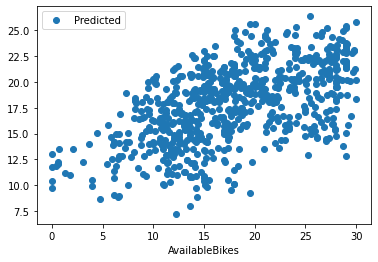

In [37]:
df_toGraph.plot(x='AvailableBikes', y='Predicted', style='o')

## The graph bears out the RMSE finding, of an average error of ~ 5 bikes
- The graph's trendline, though broad, is indicative of a model that has some predictive power

### Test simple improvement, adding one additional weather continuous variable, 'FeelsLike'

In [38]:
model_list = []
RMSE = []

In [39]:
def make_model(df, StationNumber):
    df = df.loc[(df['StationNumber'] == StationNumber)]
    df = df.resample('1h').mean()
    df = df.dropna()
    DayDummies = pd.get_dummies(df['DayOfWeek'], prefix='DayOfWeek', drop_first=True)
    df = pd.concat([df, DayDummies], axis=1)
    hours = df.index.hour
    df = pd.concat([df, pd.DataFrame(hours, index=df.index)], axis = 1)
    
    y = df['AvailableBikes']
    X = df[['Temperature', 'Windspeed', 'FeelsLike', 'DayOfWeek_1.0', 'DayOfWeek_2.0', 'DayOfWeek_3.0', 'DayOfWeek_4.0', 'DayOfWeek_5.0', 'DayOfWeek_6.0', 'DateTime']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    model = LinearRegression().fit(X, y)
    model_list.append(model)
    
    model_predictions = model.predict(X)

    print("\nPredictions with linear regression: \n")
    actual_vs_predicted_linreg = pd.concat([y, pd.DataFrame(model_predictions, columns=['Predicted'], index=y.index)], axis=1)
    print(actual_vs_predicted_linreg)
    
    train_predictions = model.predict(X_train)
    print("Actual vs predicted on training:\n", pd.concat([y_train, pd.DataFrame(train_predictions, columns=['Predicted'], index=y_train.index)], axis=1))
    printMetrics(y_train, train_predictions)

In [40]:
for i in range (118):
    if i in station_number_list:
        make_model(df_cleaned, i)
    else:
        model_list.append('Woops')


Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        9.000000   7.535826
2021-03-05 20:00:00        8.583333   7.665341
2021-03-05 21:00:00       10.166667   7.972598
2021-03-05 22:00:00       10.083333   7.897839
2021-03-05 23:00:00        9.416667   8.046323
...                             ...        ...
2021-04-16 08:00:00        3.833333   7.218176
2021-04-16 09:00:00        2.583333   6.495853
2021-04-16 10:00:00        3.500000   6.288852
2021-04-16 11:00:00        4.416667   7.966823
2021-04-16 12:00:00        3.750000   7.928937

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        9.000000   7.535826
2021-03-05 20:00:00        8.583333   7.665341
2021-03-05 21:00:00       10.166667   7.972598
2021-03-05 22:00:00       10.083333   7.897839
2021-03-05

                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        7.428571   8.763472
2021-03-05 20:00:00        9.500000   8.855294
2021-03-05 21:00:00        9.250000   8.900748
2021-03-05 22:00:00        8.333333   8.981493
2021-03-05 23:00:00        7.333333   8.937783
...                             ...        ...
2021-03-30 17:00:00        3.166667   8.438255
2021-03-30 18:00:00        1.333333   8.099594
2021-03-30 19:00:00        1.666667   8.080664
2021-03-30 20:00:00        2.666667   8.220572
2021-03-30 21:00:00        2.500000   8.186477

[503 rows x 2 columns]

MAE:  3.0529060272843824
RMSE:  3.752439257984294
R2:  0.047725766132589165

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        0.857143   5.713920
2021-03-05 20:00:00        0.000000   5.479010
2021-03-05 21:00:00        0.000000   5.149808
2021-03-05 22

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        4.428571   7.266705
2021-03-05 20:00:00        5.750000   7.042853
2021-03-05 21:00:00        6.000000   6.902685
2021-03-05 22:00:00        5.166667   6.708824
2021-03-05 23:00:00        5.000000   7.062693
...                             ...        ...
2021-03-30 17:00:00       10.833333   8.695172
2021-03-30 18:00:00        2.583333   9.407104
2021-03-30 19:00:00        0.000000   9.218324
2021-03-30 20:00:00        0.000000   8.938106
2021-03-30 21:00:00        0.000000   9.114694

[503 rows x 2 columns]

MAE:  4.614093882450253
RMSE:  5.656431670709159
R2:  -0.04279578635368564

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        2.428571  10.622201
2021-03-05 20:00:00        2.250000  10.701082
2021-

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        2.857143   4.860671
2021-03-05 20:00:00        3.166667   4.856767
2021-03-05 21:00:00        3.000000   4.806135
2021-03-05 22:00:00        3.000000   4.873936
2021-03-05 23:00:00        3.000000   4.772835
...                             ...        ...
2021-03-30 17:00:00        0.750000   5.952869
2021-03-30 18:00:00        1.000000   5.609758
2021-03-30 19:00:00        2.250000   5.655626
2021-03-30 20:00:00        2.416667   5.674607
2021-03-30 21:00:00        3.000000   5.535110

[503 rows x 2 columns]

MAE:  3.2395161223751066
RMSE:  3.9085670471542073
R2:  0.0857119799910453

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       16.000000  12.856353
2021-03-05 20:00:00       15.083333  13.458960
2021-

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        9.000000   9.691676
2021-03-05 20:00:00        9.916667   9.928763
2021-03-05 21:00:00       10.000000  10.129097
2021-03-05 22:00:00       10.000000  10.073136
2021-03-05 23:00:00       10.000000   9.770928
...                             ...        ...
2021-03-30 17:00:00       18.916667  11.793087
2021-03-30 18:00:00       19.833333  11.231089
2021-03-30 19:00:00       19.666667  10.993312
2021-03-30 20:00:00       19.833333  11.325971
2021-03-30 21:00:00       19.083333  11.335620

[503 rows x 2 columns]

MAE:  3.5734112133987406
RMSE:  4.346526145887306
R2:  0.06676071924476257

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        8.428571   7.830526
2021-03-05 20:00:00       10.083333   7.724308
2021-

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       30.000000  19.559020
2021-03-05 20:00:00       32.916667  20.865044
2021-03-05 21:00:00       34.583333  22.484018
2021-03-05 22:00:00       32.666667  22.660694
2021-03-05 23:00:00       31.666667  21.529570
...                             ...        ...
2021-03-30 17:00:00        4.416667  11.211817
2021-03-30 18:00:00       12.750000  12.800287
2021-03-30 19:00:00       12.916667  14.068722
2021-03-30 20:00:00       14.166667  15.138210
2021-03-30 21:00:00       16.416667  15.945578

[503 rows x 2 columns]

MAE:  5.195627862881982
RMSE:  6.991470144099838
R2:  0.2120870184826642

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       12.000000  11.218536
2021-03-05 20:00:00       14.000000  11.488280
2021-03

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       16.142857  11.207844
2021-03-05 20:00:00       17.833333  11.425409
2021-03-05 21:00:00       17.250000  11.772383
2021-03-05 22:00:00       15.833333  11.696366
2021-03-05 23:00:00       15.000000  11.491215
...                             ...        ...
2021-04-16 08:00:00        9.000000  11.003406
2021-04-16 09:00:00        9.666667  10.491861
2021-04-16 10:00:00       10.166667  10.027889
2021-04-16 11:00:00       10.416667  10.239305
2021-04-16 12:00:00        9.000000  10.081230

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       16.142857  11.207844
2021-03-05 20:00:00       17.833333  11.425409
2021-03-05 21:00:00       17.250000  11.772383
2021-03-05 22:00:00       15.833333  11.696366
2021-03-05 23:00:00       15.000000  11.491215
..

[503 rows x 2 columns]

MAE:  4.77570551700931
RMSE:  6.052089289263724
R2:  0.14102826773343646

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       15.571429  10.687676
2021-03-05 20:00:00       13.666667  11.248003
2021-03-05 21:00:00       14.583333  11.871065
2021-03-05 22:00:00       14.666667  11.517260
2021-03-05 23:00:00       15.000000  11.110569
...                             ...        ...
2021-04-16 08:00:00       13.083333  14.708138
2021-04-16 09:00:00       12.916667  15.132606
2021-04-16 10:00:00       13.500000  14.600445
2021-04-16 11:00:00       15.750000  13.697755
2021-04-16 12:00:00       15.000000  13.521768

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       15.571429  10.687676
2021-03-05 20:00:00       13.666667  11.248003
2021-03

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       10.142857   8.107958
2021-03-05 20:00:00       10.000000   8.144065
2021-03-05 21:00:00       12.500000   8.165705
2021-03-05 22:00:00       13.666667   8.237980
2021-03-05 23:00:00       14.000000   7.948880
...                             ...        ...
2021-04-16 08:00:00        6.666667   7.004735
2021-04-16 09:00:00        6.000000   6.929687
2021-04-16 10:00:00        4.833333   6.669520
2021-04-16 11:00:00        3.333333   5.612182
2021-04-16 12:00:00        3.375000   5.500967

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       10.142857   8.107958
2021-03-05 20:00:00       10.000000   8.144065
2021-03-05 21:00:00       12.500000   8.165705
2021-03-05 22:00:00       13.666667   8.237980
2021-03-05 23:00:00       14.000000   7.948880
..

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       15.571429  16.014959
2021-03-05 20:00:00       16.000000  16.690949
2021-03-05 21:00:00       16.000000  17.598431
2021-03-05 22:00:00       15.916667  17.631127
2021-03-05 23:00:00       17.000000  17.125519
...                             ...        ...
2021-03-30 17:00:00        4.916667  10.118311
2021-03-30 18:00:00        5.083333  11.460505
2021-03-30 19:00:00        7.333333  12.185423
2021-03-30 20:00:00        9.666667  12.681225
2021-03-30 21:00:00       11.000000  13.249357

[503 rows x 2 columns]

MAE:  3.985848887264259
RMSE:  4.959775789834888
R2:  0.21063862125749022

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       10.571429  10.922117
2021-03-05 20:00:00       12.000000  11.666697
2021-0

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       27.428571  23.175108
2021-03-05 20:00:00       28.166667  23.871264
2021-03-05 21:00:00       29.000000  24.997515
2021-03-05 22:00:00       28.333333  25.567624
2021-03-05 23:00:00       28.416667  25.312145
...                             ...        ...
2021-03-30 17:00:00        5.916667   9.484120
2021-03-30 18:00:00        8.000000  12.969206
2021-03-30 19:00:00       10.083333  15.425672
2021-03-30 20:00:00       10.750000  15.532120
2021-03-30 21:00:00       11.000000  16.305963

[503 rows x 2 columns]

MAE:  5.4737507341099105
RMSE:  6.772616491373055
R2:  0.2417397485818209

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        8.000000  15.994752
2021-03-05 20:00:00        8.000000  16.330131
2021-0

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00        6.000000   8.255404
2021-03-05 20:00:00        5.000000   7.934719
2021-03-05 21:00:00        5.000000   7.652341
2021-03-05 22:00:00        5.000000   7.611877
2021-03-05 23:00:00        5.000000   8.044625
...                             ...        ...
2021-03-30 17:00:00        9.000000   8.947463
2021-03-30 18:00:00        7.666667   9.522135
2021-03-30 19:00:00        7.000000   9.533165
2021-03-30 20:00:00        7.000000   9.141399
2021-03-30 21:00:00        7.000000   9.168300

[503 rows x 2 columns]

MAE:  3.578959512890462
RMSE:  4.664207430759898
R2:  0.182496925930291

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00            15.0  11.688107
2021-03-05 20:00:00            15.0  12.578298
2021-03-

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       10.285714   9.280589
2021-03-05 20:00:00        9.083333   9.387229
2021-03-05 21:00:00        8.416667   9.602578
2021-03-05 22:00:00       11.750000   9.581230
2021-03-05 23:00:00       16.666667   9.674244
...                             ...        ...
2021-03-30 17:00:00       10.083333   9.349556
2021-03-30 18:00:00       12.250000  10.173722
2021-03-30 19:00:00       12.416667  10.385087
2021-03-30 20:00:00       11.416667  10.400161
2021-03-30 21:00:00       13.333333  10.681167

[503 rows x 2 columns]

MAE:  4.0750848352616185
RMSE:  4.880579922677291
R2:  0.13152256057906664

Predictions with linear regression: 

                     AvailableBikes  Predicted
DateTime                                      
2021-03-05 19:00:00       19.142857  18.619853
2021-03-05 20:00:00       22.416667  19.604182
2021-

In [41]:
average_RMSE = sum(RMSE)/len(RMSE)
average_RMSE

5.03074969040294

### As the addition of 'FeelsLike' seems to have the same correlative power as 'Temperature', only less so, we aren't getting a huge improvement adding it in. As a result, we'll stick with the first set of models above, so that we can begin model implementation as quickly as possible. 
- There will always be more time to refine the model to be as predictive as possible and redeploy it without a break in service when the app is live.
- In making this decision we are also taking into consideration that our model is not intended to be used to show the user a predicted bike number at a station. It is going to be used behind the scenes, in our route recommender system, which is instead trying to present the user with the best options possible.

### Things we would love to improve in the future:
- Condense the weather categories into a three category feature being 'rain', 'snow' and 'other'
- Explore random forest models, which could be promising

# Integration Testing
## Get X features (for use in Flask app.py)

In [42]:
print("trying to connect")
mydb = mysql.connector.connect(
    host="dublinbikes.chj6z1a17hdc.us-east-1.rds.amazonaws.com",
    user="admin",
    passwd="Aws72gene!",
    database='DublinBikes',
    charset='utf8mb4',
 )

mycursor = mydb.cursor(dictionary=False)

print("Connected")

cursor = mydb.cursor()

#Pandas read sql query
sql_select_Query = pd.read_sql_query("SELECT Date, Temperature, Windspeed FROM DublinBikes.WeatherForecast48Hour", mydb)

#Create a dataframe with all of the rows fetches in the sql query
df_WF = pd.DataFrame(sql_select_Query, columns=['Date', 'Temperature', 'Windspeed'])


trying to connect
Connected


##  We use a 48 hour, hourly forecast
## This is how our model is capable of making predictions within a 48 hour time window
- The 48 hour forecast is updated daily at 4am, duuring the app's bike-data collection downtime

In [43]:
df_WF.head(4)

,Date,Temperature,Windspeed
0,2021-04-16 04:00:00,2.0,2.0
1,2021-04-16 05:00:00,2.0,2.0
2,2021-04-16 06:00:00,2.0,2.0
3,2021-04-16 07:00:00,4.0,1.0


In [44]:
def get_Xnew(day, hour, df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Hour'] = df['Date'].dt.hour
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    local_df = df.loc[(df['DayOfWeek'] == day)& (df['Hour'] == hour)]
    
    temp = int(local_df['Temperature'].to_numpy())
    wind = int(local_df['Windspeed'].to_numpy())

    if day == 0: # if i'ts monday
        array = [0, 0, 0, 0, 0, 0]
    elif day == 1: # tuesday
        array = [1, 0, 0, 0, 0, 0]
    elif day == 2: # wednesday
        array = [0, 1, 0, 0, 0, 0]
    elif day == 3: # thurs
        array = [0, 0, 1, 0, 0, 0]
    elif day == 4: # fri
        array = [0, 0, 0, 1, 0, 0]
    elif day == 5: # sat
        array = [0, 0, 0, 0, 1, 0]
    else: # sun
        array = [0, 0, 0, 0, 0, 1]

    tue = array[0]
    wed = array[1]
    thu = array[2]
    fri = array[3]
    sat = array[4]
    sun = array[5]

    X_new = pd.DataFrame({'FeelsLike': [temp], 'Windspeed' : [wind], 'DayOfWeek_1.0' : [tue], 'DayOfWeek_2.0' : [wed], 'DayOfWeek_3.0' : [thu], 'DayOfWeek_4.0': [fri], 'DayOfWeek_5.0': [sat], 'DayOfWeek_6.0': [sun], 'DateTime': [hour]})
    return X_new

In [45]:
X_new = get_Xnew(5, 8, df_WF)

In [46]:
unpickled = load('models.joblib')

In [47]:
unpickled[54].predict(X_new)[0]

7.432990784209452

- Model predicts this many ^^ bikes at station 54, at 8am on Friday, taking into account the weather

# Mirror model for available stands

In [48]:
model_list = []
RMSE = []

In [49]:
def make_model(df, StationNumber):
    df = df.loc[(df['StationNumber'] == StationNumber)]
    df = df.resample('1h').mean()
    df = df.dropna()
    DayDummies = pd.get_dummies(df['DayOfWeek'], prefix='DayOfWeek', drop_first=True)
    df = pd.concat([df, DayDummies], axis=1)
    hours = df.index.hour
    df = pd.concat([df, pd.DataFrame(hours, index=df.index)], axis = 1)
    
    y = df['AvailableBikeStands']
    X = df[['Temperature', 'Windspeed', 'DayOfWeek_1.0', 'DayOfWeek_2.0', 'DayOfWeek_3.0', 'DayOfWeek_4.0', 'DayOfWeek_5.0', 'DayOfWeek_6.0', 'DateTime']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    model = LinearRegression().fit(X, y)
    model_list.append(model)
    
    model_predictions = model.predict(X)

    print("\nPredictions with linear regression: \n")
    actual_vs_predicted_linreg = pd.concat([y, pd.DataFrame(model_predictions, columns=['Predicted'], index=y.index)], axis=1)
    print(actual_vs_predicted_linreg)
    
    train_predictions = model.predict(X_train)
    print("Actual vs predicted on training:\n", pd.concat([y_train, pd.DataFrame(train_predictions, columns=['Predicted'], index=y_train.index)], axis=1))
    printMetrics(y_train, train_predictions)

In [50]:
for i in range (118):
    if i in station_number_list:
        make_model(df_cleaned, i)
    else:
        model_list.append('Woops')


Predictions with linear regression: 

                     AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00            11.000000  11.905200
2021-03-05 20:00:00            11.416667  11.608726
2021-03-05 21:00:00             9.833333  11.202645
2021-03-05 22:00:00             9.916667  11.103364
2021-03-05 23:00:00            10.583333  11.301989
...                                  ...        ...
2021-04-16 08:00:00            16.166667  14.131765
2021-04-16 09:00:00            17.416667  14.563194
2021-04-16 10:00:00            16.500000  14.981032
2021-04-16 11:00:00            15.583333  15.142645
2021-04-16 12:00:00            16.250000  15.223234

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00            11.000000  11.905200
2021-03-05 20:00:00            11.416667  11.608726
2021-03-05 21:00:00

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00            29.142857  24.395384
2021-03-05 20:00:00            30.000000  24.661553
2021-03-05 21:00:00            30.000000  25.010475
2021-03-05 22:00:00            29.500000  25.097992
2021-03-05 23:00:00            29.583333  24.952471
...                                  ...        ...
2021-03-30 17:00:00            18.083333  20.264322
2021-03-30 18:00:00            18.000000  20.821099
2021-03-30 19:00:00            18.000000  21.212368
2021-03-30 20:00:00            18.000000  21.396890
2021-03-30 21:00:00            17.500000  21.611857

[503 rows x 2 columns]

MAE:  2.775071475590873
RMSE:  3.5327792740649597
R2:  0.13098129608504416

Predictions with linear regression: 

                     AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00     

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00            17.571429   9.037862
2021-03-05 20:00:00            17.750000   8.868861
2021-03-05 21:00:00            17.000000   8.573859
2021-03-05 22:00:00            17.083333   8.385232
2021-03-05 23:00:00            17.416667   8.471889
...                                  ...        ...
2021-03-30 17:00:00             3.833333  12.820131
2021-03-30 18:00:00             2.083333  11.771188
2021-03-30 19:00:00             0.916667  10.974247
2021-03-30 20:00:00             3.000000  10.995843
2021-03-30 21:00:00             3.416667  10.812006

[503 rows x 2 columns]

MAE:  3.532933529421999
RMSE:  4.3093177449102775
R2:  0.13370106429387352

Predictions with linear regression: 

                     AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00     

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00             4.000000   7.503959
2021-03-05 20:00:00             4.916667   7.015052
2021-03-05 21:00:00             2.083333   6.377809
2021-03-05 22:00:00             0.000000   6.306769
2021-03-05 23:00:00             0.000000   6.680076
...                                  ...        ...
2021-03-30 17:00:00            18.083333  11.319513
2021-03-30 18:00:00            19.666667  10.456142
2021-03-30 19:00:00            19.416667   9.889441
2021-03-30 20:00:00            17.500000   9.524696
2021-03-30 21:00:00            17.083333   9.158633

[503 rows x 2 columns]

MAE:  4.4781633592238235
RMSE:  5.2427511568959755
R2:  0.10601777512388344

Predictions with linear regression: 

                     AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00    

[503 rows x 2 columns]

MAE:  3.5839022880996825
RMSE:  4.3707795501162385
R2:  0.05601789631284104

Predictions with linear regression: 

                     AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00            11.571429  11.975326
2021-03-05 20:00:00             9.916667  12.019389
2021-03-05 21:00:00             8.916667  12.102228
2021-03-05 22:00:00             8.000000  12.227565
2021-03-05 23:00:00             8.000000  12.288704
...                                  ...        ...
2021-04-16 08:00:00             1.583333  10.119763
2021-04-16 09:00:00             2.083333   9.885724
2021-04-16 10:00:00             1.250000   9.869313
2021-04-16 11:00:00             3.000000  10.163232
2021-04-16 12:00:00             2.875000  10.204342

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00    

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00            10.000000  20.654634
2021-03-05 20:00:00             7.083333  19.419638
2021-03-05 21:00:00             5.416667  17.842439
2021-03-05 22:00:00             7.333333  17.750350
2021-03-05 23:00:00             8.333333  18.732140
...                                  ...        ...
2021-03-30 17:00:00            35.333333  28.591753
2021-03-30 18:00:00            26.166667  26.761255
2021-03-30 19:00:00            26.083333  25.615161
2021-03-30 20:00:00            24.833333  24.625938
2021-03-30 21:00:00            22.583333  23.731262

[503 rows x 2 columns]

MAE:  5.199204636378344
RMSE:  6.989004561497672
R2:  0.2106924358650929

Predictions with linear regression: 

                     AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00       

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00            23.857143  28.572380
2021-03-05 20:00:00            22.166667  28.294618
2021-03-05 21:00:00            22.750000  27.911969
2021-03-05 22:00:00            24.166667  27.935771
2021-03-05 23:00:00            25.000000  28.275429
...                                  ...        ...
2021-03-30 17:00:00            29.000000  28.369651
2021-03-30 18:00:00            25.083333  27.836246
2021-03-30 19:00:00            24.416667  27.512615
2021-03-30 20:00:00            24.000000  27.321263
2021-03-30 21:00:00            24.000000  27.132302

[503 rows x 2 columns]

MAE:  3.5992955328412495
RMSE:  4.474203413260962
R2:  0.11102110550393551

Predictions with linear regression: 

                     AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00     

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00            25.285714  23.860634
2021-03-05 20:00:00            27.000000  23.656252
2021-03-05 21:00:00            26.000000  23.303030
2021-03-05 22:00:00            24.583333  22.998041
2021-03-05 23:00:00            25.166667  22.997119
...                                  ...        ...
2021-03-30 17:00:00            24.166667  27.450269
2021-03-30 18:00:00            19.166667  26.090316
2021-03-30 19:00:00            15.250000  25.028041
2021-03-30 20:00:00            10.750000  25.066398
2021-03-30 21:00:00             8.000000  24.819856

[503 rows x 2 columns]

MAE:  5.09477704577757
RMSE:  6.378828150213154
R2:  0.038531689866878494

Predictions with linear regression: 

                     AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00      

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00            18.857143  21.231239
2021-03-05 20:00:00            19.000000  21.294657
2021-03-05 21:00:00            16.500000  21.331627
2021-03-05 22:00:00            15.333333  21.365302
2021-03-05 23:00:00            15.000000  21.449771
...                                  ...        ...
2021-03-30 17:00:00            23.333333  22.174483
2021-03-30 18:00:00            25.250000  22.014766
2021-03-30 19:00:00            25.583333  21.907944
2021-03-30 20:00:00            23.916667  22.017192
2021-03-30 21:00:00            23.666667  22.069343

[503 rows x 2 columns]

MAE:  3.4431150767374583
RMSE:  4.220247777299711
R2:  0.09786109207013483

Predictions with linear regression: 

                     AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00     

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00            28.000000  31.791588
2021-03-05 20:00:00            27.666667  32.038183
2021-03-05 21:00:00            24.750000  32.360411
2021-03-05 22:00:00            24.000000  32.434290
2021-03-05 23:00:00            23.916667  32.292608
...                                  ...        ...
2021-03-30 17:00:00            32.083333  29.671407
2021-03-30 18:00:00            30.500000  30.169451
2021-03-30 19:00:00            25.666667  30.516230
2021-03-30 20:00:00            25.000000  30.690348
2021-03-30 21:00:00            24.083333  30.887144

[503 rows x 2 columns]

MAE:  4.936079656742763
RMSE:  6.054227096582164
R2:  -0.03186772676662475

Predictions with linear regression: 

                     AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00     

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00                 31.0  33.972998
2021-03-05 20:00:00                 31.0  33.687324
2021-03-05 21:00:00                 31.0  33.309316
2021-03-05 22:00:00                 31.0  33.277323
2021-03-05 23:00:00                 31.0  33.520170
...                                  ...        ...
2021-03-30 17:00:00                 26.0  35.029915
2021-03-30 18:00:00                 26.0  34.501503
2021-03-30 19:00:00                 26.0  34.157760
2021-03-30 20:00:00                 26.0  33.950836
2021-03-30 21:00:00                 26.0  33.739583

[503 rows x 2 columns]

MAE:  2.6871858428583413
RMSE:  3.2210326864949756
R2:  0.016857689172293355

Predictions with linear regression: 

                     AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00   

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00            34.000000  31.411222
2021-03-05 20:00:00            35.000000  31.622110
2021-03-05 21:00:00            35.000000  31.848754
2021-03-05 22:00:00            35.000000  31.780426
2021-03-05 23:00:00            35.000000  31.600857
...                                  ...        ...
2021-03-30 17:00:00            31.000000  30.652615
2021-03-30 18:00:00            32.333333  30.551028
2021-03-30 19:00:00            33.000000  30.417930
2021-03-30 20:00:00            33.000000  30.669002
2021-03-30 21:00:00            33.000000  30.792123

[503 rows x 2 columns]

MAE:  3.6578432233415805
RMSE:  4.761808752076175
R2:  0.17546613193224736

Predictions with linear regression: 

                     AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00     

[719 rows x 2 columns]
Actual vs predicted on training:
                      AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00            10.857143  11.822841
2021-03-05 20:00:00             7.583333  10.991376
2021-03-05 21:00:00             5.916667   9.868390
2021-03-05 22:00:00             5.750000   9.623696
2021-03-05 23:00:00             0.916667  10.188327
...                                  ...        ...
2021-03-30 17:00:00            17.666667  19.384132
2021-03-30 18:00:00            14.666667  17.465058
2021-03-30 19:00:00            12.250000  16.129025
2021-03-30 20:00:00             7.416667  15.594859
2021-03-30 21:00:00             6.500000  14.930217

[503 rows x 2 columns]

MAE:  4.820611736365912
RMSE:  6.0143457981222515
R2:  0.2692631551223508

Predictions with linear regression: 

                     AvailableBikeStands  Predicted
DateTime                                           
2021-03-05 19:00:00      

In [51]:
average_RMSE = sum(RMSE)/len(RMSE)
average_RMSE

5.118315170677304

In [52]:
model_list

['Woops',
 'Woops',
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 'Woops',
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 'Woops',
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 'Woops',
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 'Woops',
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegressio

In [53]:
dump(model_list, 'availableStandsModels.joblib')

['availableStandsModels.joblib']

In [54]:
model_list[54].predict(X_new)[0] # check available stands prediction

26.280731885460302

In [55]:
unpickled[54].predict(X_new)[0] # corresponding available bikes prediction

7.432990784209452

#### That's all that's here, thanks for taking the time to read this, all the best with the marking!